In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA,SparsePCA,IncrementalPCA,TruncatedSVD,FastICA,MiniBatchSparsePCA,FactorAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import random
import matplotlib.pyplot as plt
import math

data = pd.read_csv("/content/drive/MyDrive/論文程式/Electrical Grid.csv")

data_x = data.drop(['stab','stabf'],axis=1)
data_y = data['stab']

scaler = MinMaxScaler()
scaled_x = scaler.fit_transform(data_x)
scaled_x = pd.DataFrame(scaled_x, columns=data_x.columns)

def Strength_Random_Forest(training_x , training_y, test_x, max_depth, sample_size, n_trees, n_features):
    strength_set = []
    test_predicted_ys = []
    for i in range(n_trees):
        train_x, valid_x ,train_y ,valid_y = train_test_split(training_x, training_y , train_size = sample_size) #隨機選擇n%的樣本
        DT = DecisionTreeRegressor(max_depth = max_depth , max_features=n_features )
        DT.fit(train_x,train_y)
        dt_pred = DT.predict(valid_x)

        confidence = []
        margin = np.abs(dt_pred - valid_y)
        for j in range(len(margin)):
            confidence.append(1/ math.exp(margin.values[j]))
        strength = np.sum(confidence)/len(confidence)
        strength_set.append(strength)

        test_pred = DT.predict(test_x)
        test_predicted_ys.append(test_pred)

        final_result = []
    for i in range(len(test_predicted_ys[0])): #y的數量
        predict_result = [] #存放每棵樹的預測值 #100棵樹有100個預測值
        for j in range(len(test_predicted_ys)):
            predict_result.append( (test_predicted_ys[j][i]) )
        strength_predict_result = np.array(predict_result) * np.array(strength_set) #每顆樹的預測值*每個樹的strength
        final_result.append( np.mean(strength_predict_result)  ) #存放最後的2000個預測值
            
    return final_result

4
6
8
10
12
[0.012558376708079962, 0.012126640837484708, 0.012056709097633676, 0.012111036720681036, 0.012183523625833425]


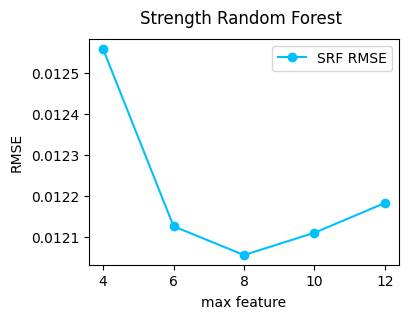

In [ ]:
kf = KFold(n_splits =5 ,shuffle= True,random_state= 42)
RMSE_set_rf_depth ,mape_set_rf_depth = [],[]
cnt = 1
features = [4,6,8,10,12]
for feature in features:
    print(feature)
    RMSE_set ,mape_set= [],[]
    for train_index, valid_index in kf.split(scaled_x, data_y): # split()  method generate indices to split data intSo training and test set.
        #print('fold',cnt)
        train_x = scaled_x.iloc[train_index,:]
        train_y = data.iloc[train_index,:]['stab']
        valid_x = scaled_x.iloc[valid_index,:]
        valid_y = data.iloc[valid_index,:]['stab']

        SRF = Strength_Random_Forest(training_x = train_x , training_y=train_y, test_x = valid_x, max_depth = 30 , sample_size=0.7, n_trees=100, n_features=feature)
        RMSE_set.append( np.sqrt( mean_squared_error(valid_y,SRF)))

    RMSE_set_rf_depth.append(np.mean(RMSE_set))
    
print(RMSE_set_rf_depth)
plt.figure(figsize=(4,3),dpi=100,linewidth = 2)
plt.plot(features,RMSE_set_rf_depth,'o-',color = 'deepskyblue', label="SRF RMSE")
plt.title("Strength Random Forest ", x=0.5, y=1.03)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("max feature", fontsize=10 , labelpad = 5)
plt.ylabel("RMSE", fontsize=10, labelpad = 5)
plt.legend(loc = "best", fontsize=10)
plt.show()

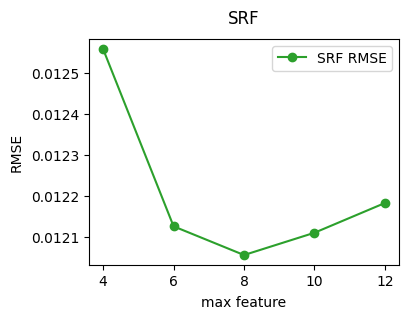

In [ ]:
import matplotlib.pyplot as plt

features = [4,6,8,10,12]
RMSE_set_rf_depth = [0.012558376708079962, 0.012126640837484708, 0.012056709097633676, 0.012111036720681036, 0.012183523625833425]
plt.figure(figsize=(4,3),dpi=100,linewidth = 2)
plt.plot(features,RMSE_set_rf_depth,'o-',color = 'tab:green', label="SRF RMSE")
plt.title("SRF", x=0.5, y=1.03)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("max feature", fontsize=10 , labelpad = 5)
plt.ylabel("RMSE", fontsize=10, labelpad = 5)
plt.legend(loc = "best", fontsize=10)
plt.show()

300
500
700
900
[0.012120475807245512, 0.012094384640274998, 0.01206716608450176, 0.012073492963861504]


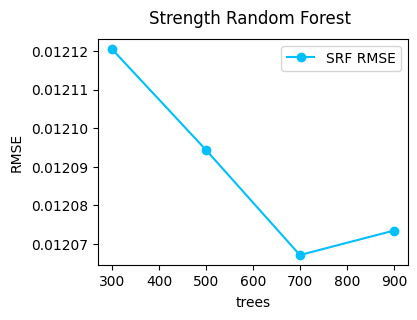

In [ ]:
kf = KFold(n_splits =5 ,shuffle= True,random_state= 42)
RMSE_set_rf_depth ,mape_set_rf_depth = [],[]

trees = [300,500,700,900]
for tree in trees:
    print(tree)
    RMSE_set ,mape_set= [],[]
    for train_index, valid_index in kf.split(scaled_x, data_y): # split()  method generate indices to split data intSo training and test set.
        #print('fold',cnt)
        train_x = scaled_x.iloc[train_index,:]
        train_y = data.iloc[train_index,:]['stab']
        valid_x = scaled_x.iloc[valid_index,:]
        valid_y = data.iloc[valid_index,:]['stab']

        SRF = Strength_Random_Forest(training_x = train_x , training_y=train_y, test_x = valid_x, max_depth = 30 , sample_size=0.7, n_trees = tree, n_features=12)
        RMSE_set.append( np.sqrt( mean_squared_error(valid_y,SRF)))

    RMSE_set_rf_depth.append(np.mean(RMSE_set))
    
print(RMSE_set_rf_depth)
plt.figure(figsize=(4,3),dpi=100,linewidth = 2)
plt.plot(trees,RMSE_set_rf_depth,'o-',color = 'deepskyblue', label="SRF RMSE")
plt.title("Strength Random Forest ", x=0.5, y=1.03)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("trees", fontsize=10 , labelpad = 5)
plt.ylabel("RMSE", fontsize=10, labelpad = 5)
plt.legend(loc = "best", fontsize=10)
plt.show() 

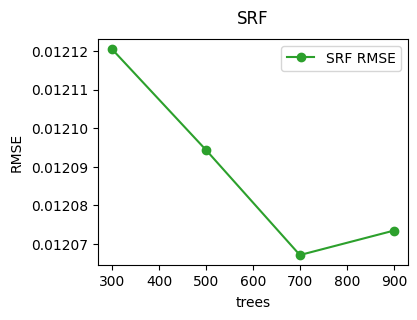

In [ ]:
trees = [300,500,700,900]
RMSE_set_rf_depth = [0.012120475807245512, 0.012094384640274998, 0.01206716608450176, 0.012073492963861504]
plt.figure(figsize=(4,3),dpi=100,linewidth = 2)
plt.plot(trees,RMSE_set_rf_depth,'o-',color = 'tab:green', label="SRF RMSE")
plt.title("SRF", x=0.5, y=1.03)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("trees", fontsize=10 , labelpad = 5)
plt.ylabel("RMSE", fontsize=10, labelpad = 5)
plt.legend(loc = "best", fontsize=10)
plt.show() 

0.5
0.7
0.9
[0.012190250998464162, 0.011984961470595709, 0.012013410826918891]


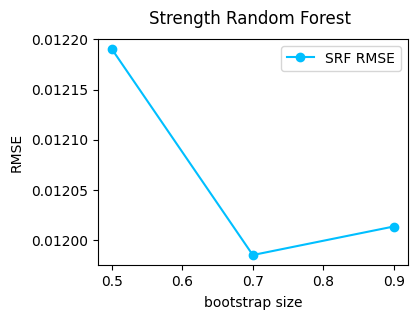

In [ ]:
kf = KFold(n_splits =5 ,shuffle= True,random_state= 42)
RMSE_set_rf_depth ,mape_set_rf_depth = [],[]
cnt = 1
bootstrap_sizes = [0.5,0.7,0.9]
for bootstrap_size in bootstrap_sizes:
    print(bootstrap_size)
    RMSE_set ,mape_set= [],[]
    for train_index, valid_index in kf.split(scaled_x, data_y): # split()  method generate indices to split data intSo training and test set.
        #print('fold',cnt)
        train_x = scaled_x.iloc[train_index,:]
        train_y = data.iloc[train_index,:]['stab']
        valid_x = scaled_x.iloc[valid_index,:]
        valid_y = data.iloc[valid_index,:]['stab']

        SRF = Strength_Random_Forest(training_x = train_x , training_y=train_y, test_x = valid_x, max_depth = 30 , sample_size=bootstrap_size, n_trees=300, n_features=8)
        RMSE_set.append( np.sqrt( mean_squared_error(valid_y,SRF)))

    RMSE_set_rf_depth.append(np.mean(RMSE_set))
    
print(RMSE_set_rf_depth)
plt.figure(figsize=(4,3),dpi=100,linewidth = 2)
plt.plot(bootstrap_sizes,RMSE_set_rf_depth,'o-',color = 'deepskyblue', label="SRF RMSE")
plt.title("Strength Random Forest ", x=0.5, y=1.03)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("bootstrap size", fontsize=10 , labelpad = 5)
plt.ylabel("RMSE", fontsize=10, labelpad = 5)
plt.legend(loc = "best", fontsize=10)
plt.show()

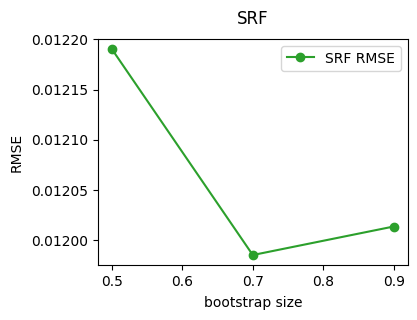

In [ ]:
bootstrap_sizes = [0.5,0.7,0.9]
RMSE_set_rf_depth = [0.012190250998464162, 0.011984961470595709, 0.012013410826918891]
plt.figure(figsize=(4,3),dpi=100,linewidth = 2)
plt.plot(bootstrap_sizes,RMSE_set_rf_depth,'o-',color = 'tab:green', label="SRF RMSE")
plt.title("SRF", x=0.5, y=1.03)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("bootstrap size", fontsize=10 , labelpad = 5)
plt.ylabel("RMSE", fontsize=10, labelpad = 5)
plt.legend(loc = "best", fontsize=10)
plt.show()

10
20
30
40
50
[0.013324017233190105, 0.01199370479159617, 0.012016539235479596, 0.012014060458932668, 0.011997553634856755]


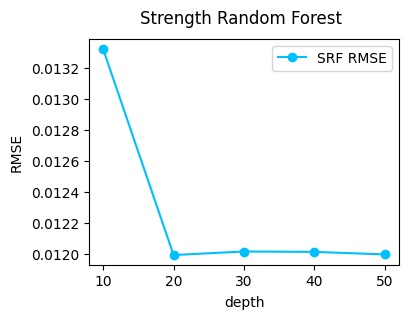

In [ ]:
kf = KFold(n_splits =5 ,shuffle= True,random_state= 42)
RMSE_set_rf_depth ,mape_set_rf_depth = [],[]
cnt = 1
depths = [10,20,30,40,50]
for depth in depths:
    print(depth)
    RMSE_set ,mape_set= [],[]
    for train_index, valid_index in kf.split(scaled_x, data_y): # split()  method generate indices to split data intSo training and test set.
        #print('fold',cnt)
        train_x = scaled_x.iloc[train_index,:]
        train_y = data.iloc[train_index,:]['stab']
        valid_x = scaled_x.iloc[valid_index,:]
        valid_y = data.iloc[valid_index,:]['stab']

        SRF = Strength_Random_Forest(training_x = train_x , training_y=train_y, test_x = valid_x, max_depth = depth , sample_size=0.9, n_trees=300, n_features=8)
        RMSE_set.append( np.sqrt( mean_squared_error(valid_y,SRF)))

    RMSE_set_rf_depth.append(np.mean(RMSE_set))
    
print(RMSE_set_rf_depth)
plt.figure(figsize=(4,3),dpi=100,linewidth = 2)
plt.plot(depths,RMSE_set_rf_depth,'o-',color = 'deepskyblue', label="SRF RMSE")
plt.title("Strength Random Forest ", x=0.5, y=1.03)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("depth", fontsize=10 , labelpad = 5)
plt.ylabel("RMSE", fontsize=10, labelpad = 5)
plt.legend(loc = "best", fontsize=10)
plt.show()

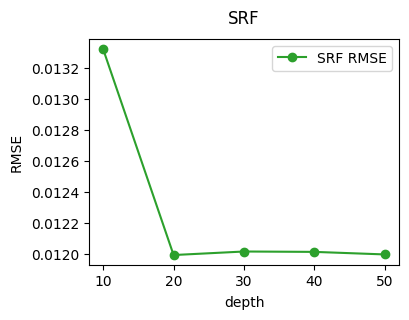

In [ ]:
depths = [10,20,30,40,50]
RMSE_set_rf_depth = [0.013324017233190105, 0.01199370479159617, 0.012016539235479596, 0.012014060458932668, 0.011997553634856755]

plt.figure(figsize=(4,3),dpi=100,linewidth = 2)
plt.plot(depths,RMSE_set_rf_depth,'o-',color = 'tab:green', label="SRF RMSE")
plt.title("SRF", x=0.5, y=1.03)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("depth", fontsize=10 , labelpad = 5)
plt.ylabel("RMSE", fontsize=10, labelpad = 5)
plt.legend(loc = "best", fontsize=10)
plt.show()

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cnt = 1
RMSE_set_srf = []
for train_index, valid_index in kf.split(scaled_x, data_y): # split()  method generate indices to split data intSo training and test set.
    print('fold',cnt)
    train_x = scaled_x.iloc[train_index,:]
    train_y = data.iloc[train_index,:]['stab']
    valid_x = scaled_x.iloc[valid_index,:]
    valid_y = data.iloc[valid_index,:]['stab']
    
    srf_pred = Strength_Random_Forest( training_x = train_x , training_y = train_y ,test_x= valid_x, n_trees = 700, max_depth= 20, sample_size = 0.7, n_features = 8)   
    RMSE_set_srf.append( np.sqrt( mean_squared_error(valid_y,srf_pred)))
    cnt+=1

print("srf",RMSE_set_srf)
print("mean",np.mean(RMSE_set_srf) )

fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9
fold 10
srf [0.012158115054804755, 0.011981810961840023, 0.011985212266757667, 0.011515547859983516, 0.011383440838220077, 0.011782985867463847, 0.011204183816990669, 0.011543059042663905, 0.011476112576474141, 0.012698954301986502]
mean 0.01177294225871851
